
# 1. 강의영상

<https://youtu.be/playlist?list=PLQqh36zP38-zXz97SY6e8rSowprIvDS2a&si=Y8pI1Dyw2VaYeayc>

# 2. Imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn.linear_model

# 3. Data

`-` 전주시의 기온 불러오기

In [16]:
raw = pd.read_csv('https://raw.githubusercontent.com/guebin/DV2022/master/posts/temp.csv')
raw.head()

,지점번호,지점명,일시,평균기온(℃),최고기온(℃),최고기온시각,최저기온(℃)
0,146,전주,2020-01-01,-0.5,4.3,15:09,-6.4
1,146,전주,2020-01-02,1.4,6.5,14:12,-3.0
2,146,전주,2020-01-03,2.6,7.6,13:32,-0.5
3,146,전주,2020-01-04,2.0,7.7,13:51,-2.6
4,146,전주,2020-01-05,2.5,8.6,14:05,-3.2


In [17]:
temp = pd.read_csv('https://raw.githubusercontent.com/guebin/DV2022/master/posts/temp.csv').iloc[:,3].to_numpy()[:100]
temp.sort() # 가장 낮은기온 순으로 정렬.

In [18]:
temp # 전주시의 기온, 100개

array([-4.1, -3.7, -3. , -1.3, -0.5, -0.3,  0.3,  0.4,  0.4,  0.7,  0.7,
        0.9,  0.9,  1. ,  1.2,  1.4,  1.4,  1.5,  1.5,  2. ,  2. ,  2. ,
        2.3,  2.5,  2.5,  2.5,  2.6,  2.6,  2.9,  3.2,  3.5,  3.5,  3.6,
        3.7,  3.8,  4.2,  4.4,  4.5,  4.5,  4.6,  4.9,  4.9,  4.9,  5. ,
        5. ,  5.1,  5.6,  5.9,  5.9,  6. ,  6. ,  6.1,  6.1,  6.3,  6.3,
        6.4,  6.4,  6.5,  6.7,  6.8,  6.8,  7. ,  7. ,  7.1,  7.2,  7.4,
        7.7,  8. ,  8.1,  8.1,  8.3,  8.4,  8.4,  8.4,  8.5,  8.8,  8.9,
        9.1,  9.2,  9.3,  9.4,  9.4,  9.5,  9.6,  9.6,  9.7,  9.8,  9.9,
       10.2, 10.3, 10.6, 10.6, 10.8, 11.2, 12.1, 12.4, 13.4, 14.7, 15. ,
       15.2])

`-` 아래와 같은 모형을 가정하자.

$$\textup{아이스크림 판매량} = 20 + \textup{온도} \times 2.5 + \textup{오차(운)}$$

In [19]:
np.random.seed(43052)
eps = np.random.randn(100)*3 # 오차
icecream_sales = 20 + temp * 2.5 + eps 

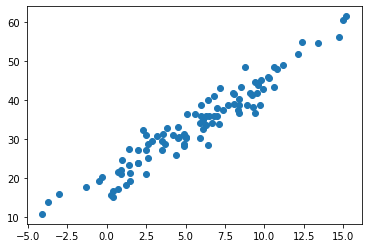

In [6]:
plt.plot(temp,icecream_sales,'o')

> 실제로 저런 모형이 맞느냐? 모름.. (실제모형은 알게뭐임? 그렇게
> 가정하면 된다.)

`-` 주어진 자료: 우리는 아래를 관측했다고 생각하자.

In [24]:
df = pd.DataFrame({'temp':temp,'sales':icecream_sales})
df

,temp,sales
0,-4.1,10.900261
1,-3.7,14.002524
2,-3.0,15.928335
3,-1.3,17.673681
4,-0.5,19.463362
...,...,...
95,12.4,54.926065
96,13.4,54.716129
97,14.7,56.194791
98,15.0,60.666163


# 4. 게임셋팅

`-` 주어진 자료는 아래와 같다.

In [25]:
df

,temp,sales
0,-4.1,10.900261
1,-3.7,14.002524
2,-3.0,15.928335
3,-1.3,17.673681
4,-0.5,19.463362
...,...,...
95,12.4,54.926065
96,13.4,54.716129
97,14.7,56.194791
98,15.0,60.666163


`-` 편의상 아래와 같은 기호를 도입하자.

-   (`df.temp[0]`, `df.temp[1]`, … , `df.temp[99]`) =
    $(x_1,x_2,\dots,x_{100})=(-4.1,-3.7,\dots,15.2)$
-   (`df.sales[0]`, `df.sales[1]`, … , `df.sales[99]`) =
    $(y_1,y_2,\dots,y_{100})=(10.90,14.00, \dots,61.56)$

`-` 우리는 이 자료 $\big\{(x_i,y_i)\big\}_{i=1}^{100}$ 를 바탕으로
어떠한 “패턴”을 발견하여 새로운 $x$에 대한 예측값을 알고 싶다.

## A. 질문

`-` 질문: 기온이 $x=-2.0$ 일 때 아이스크림을 얼마정도 판다고 보는게
타당할까?

## B. 답1

`-` $x=-2.0$ 근처의 데이터를 살펴보자.

In [30]:
df[(-3.0 < df.temp) & (df.temp < -1.0)]

,temp,sales
3,-1.3,17.673681


대충 17.67 근처이지 않을까?..

## C. 답2

`-` 자료를 바탕으로 그림을 그려보자.

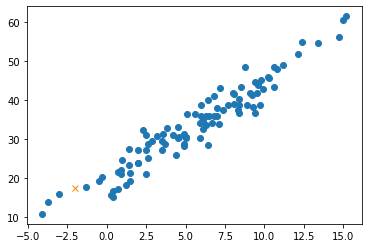

In [34]:
plt.plot(df.temp,df.sales,'o')
plt.plot([-2.0],[17.67],'x')

-   저거 보다 못팔 것 같은데?

## D. 아이디어

`-` 선을 기가 막히게 그어서 추세선을 만들고, 그 추세선 위의 점으로
예측하자.

`-` 속마음: 사실 추세선을 알고 있긴함

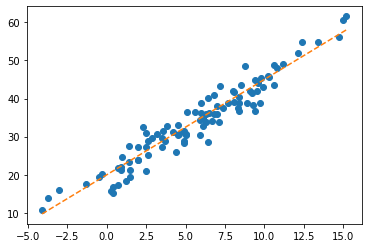

In [37]:
plt.plot(df.temp,df.sales,'o')
plt.plot(df.temp,20+df.temp*2.5,'--')

`-` 사실 $y=20+2.5x$ 라는 추세선을 그으면 된다는 것을 알고 있다.

`-` 그래서 $x=-2$ 이라면 $y=20-2.5\times 2=15$ 라고 보는게 합리적임.
(물론 오차가 있을 수 있지만 그건 운이므로 어쩔수 없는것임, 랜덤으로 뭐가
나올지까지 맞출 수는 없음[1])

`-` 그렇지만 우리는 사실 $20, 2.5$ 라는 숫자를 모른다. (이 숫자만 안다면
임의의 $x$에 대한 $y$값을 알 수 있을 텐데…)

`-` 게임셋팅

-   원래게임: 임의의 $x$에 대하여 합리적인 $y$를 잘 찾는 게임
-   변형된게임: $20,2.5$ 라는 숫자를 잘 찾는 게임, 즉 데이터를 보고
    최대한 $y_i \approx ax_i+b$ 이 되도록 $a,b$를 잘 선택하는 게임


# 5. 분석

## A. 데이터

`-` 변수 설정

[1] 만약 그렇다면 랜덤이 아니겠지?

In [61]:
X = df[['temp']] # 독립변수, 설명변수, 피쳐
y = df[['sales']] # 종속변수, 반응변수, 타겟 

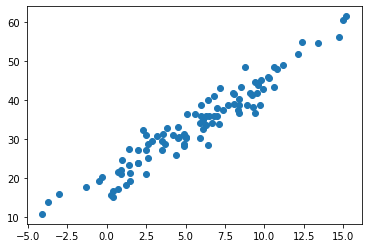

In [62]:
plt.plot(X,y,'o')

`-` 질문: 기온이 $x=-2.0$ 일 때 아이스크림을 얼마정도 판다고 보는게
타당할까?

In [63]:
df[(-3.0 < df.temp) & (df.temp < -1.0)]

,temp,sales
3,-1.3,17.673681


`-` 답1: 대충 17.67 근처이지 않을까?..

`-` 답2: 17.67 보다 작지 않을까?

`-` 아이디어: 추세선을 그리고 거기서 예측해보면 어떨까?

`-` 데이터를 학습하여 추세선을 적절히 그릴 수 있고, 그려진 추세선으로
예측까지 해줄수 있는 아이(predictor)를 만들자.

## B. Predictor 생성

In [45]:
predictr = sklearn.linear_model.LinearRegression() 
predictr 

LinearRegression()

-   linear regression 이라는 방법으로 추세선을 만들고 예측하는
    아이(predictor)를 만드는 코드

## C. 학습 (fit, learn)

In [66]:
predictr.fit(X,y)

LinearRegression()

## D. 예측 (predict)

`-` Predictor: 데이터를 살펴보니 원래 true는 이럴것 같아요

In [67]:
yhat = predictr.predict(X)

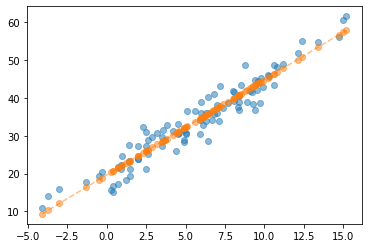

In [68]:
plt.plot(X,y,'o',alpha=0.5)
plt.plot(X,yhat, 'o--',alpha=0.5)

`-` 최규빈: 저런 추세선을 그었다면, $y=ax+b$ 꼴의 식에서 $a$, $b$를
적당한 값으로 찾았다는 의미인데, 그 값은 어디있지?

`-` Predictor: 아래에 있어요

In [69]:
a = predictr.coef_,
b = predictr.intercept_

In [70]:
a,b

((array([[2.51561216]]),), array([19.66713127]))

`-` 최규빈: 확인해보자..

In [71]:
(df.temp * 2.51561216 + 19.66713127)[:5], yhat[:5]

(0     9.353121
 1    10.359366
 2    12.120295
 3    16.396835
 4    18.409325
 Name: temp, dtype: float64,
 array([[ 9.35312141],
        [10.35936628],
        [12.12029479],
        [16.39683546],
        [18.40932519]]))

`-` 새로운 데이터 $x=-2$ 에 대한 예측 (1) – 수식위주로

In [72]:
2.51561216*(-2) + 19.66713127

14.635906949999999

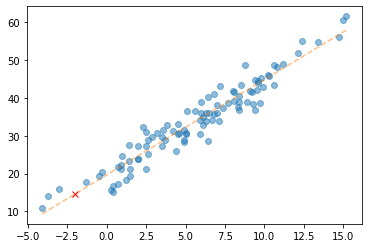

In [73]:
plt.plot(X,y,'o',alpha=0.5)
plt.plot(X,yhat,'--',alpha=0.5)
plt.plot([-2],[14.635906949999999],'xr') # -2에 대한 예측

`-` 새로운 데이터 $x=-2$ 에 대한 예측 (2) – 코드위주로 ($\star$)

In [74]:
Xnew = pd.DataFrame({'temp':[-2.0]})
Xnew

,temp
0,-2.0


In [75]:
predictr.predict(Xnew)

array([[14.63590695]])

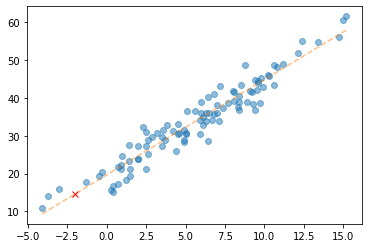

In [76]:
plt.plot(X,y,'o',alpha=0.5)
plt.plot(X,yhat,'--',alpha=0.5)
plt.plot(Xnew, predictr.predict(Xnew),'xr')